In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784')

In [14]:
data, target = mnist["data"], mnist["target"]
print(f"data의 type : {type(data)},  data의 shape : {data.shape}")
print(f"target의 type : {type(target)},  target의 shape : {target.shape}")

data의 type : <class 'pandas.core.frame.DataFrame'>,  data의 shape : (70000, 784)
target의 type : <class 'pandas.core.series.Series'>,  target의 shape : (70000,)


In [15]:
target.dtypes

CategoricalDtype(categories=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], ordered=False)

In [17]:
data, target = mnist["data"], mnist["target"]

In [18]:
# Since data type of all elements of target is string, we'll convert them into integer
target = target.astype(np.int8)

# We'll extract only values from data and target.
data, target = data.values, target.values.reshape(1, -1)

print(f"data의 type :   {type(data)},  data의 shape : {data.shape}")
print(f"target의 type : {type(target)},  target의 shape : {target.shape},   target element의 type : {type(target[0])}")

data의 type :   <class 'numpy.ndarray'>,  data의 shape : (70000, 784)
target의 type : <class 'numpy.ndarray'>,  target의 shape : (1, 70000),   target element의 type : <class 'numpy.ndarray'>


In [19]:
target_dict = {}
label, freq = np.unique(target, return_counts=True)
for l, f in zip(label, freq):
    target_dict[l] = f
    
print(target_dict)

{0: 6903, 1: 7877, 2: 6990, 3: 7141, 4: 6824, 5: 6313, 6: 6876, 7: 7293, 8: 6825, 9: 6958}


In [20]:
# Normalize data to keep our gradients manageable
data = data / 255
print(np.max(data), np.min(data))

1.0 0.0


In [24]:
digits = 10
examples = target.shape[1]

target_new = np.eye(digits)[target]
target_new = target_new.T.reshape(digits, examples)
target_new.shape

(10, 70000)

In [25]:
# We'll split data into train and test set. We also transpose data to keep each example as a column.
m = 60000
m_test = data.shape[0] - m

x_train, x_test = data[:m].T, data[m:].T
y_train, y_test = target_new[:, :m], target_new[:, m:]

print(f"x_train의 shape : {x_train.shape},   y_train의 shape : {y_train.shape}")
print(f"x_test의  shape : {x_test.shape},   y_test의 shape :  {y_test.shape}")

x_train의 shape : (784, 60000),   y_train의 shape : (10, 60000)
x_test의  shape : (784, 10000),   y_test의 shape :  (10, 10000)


In [26]:
np.random.seed(2023)
shuffle_index = np.random.permutation(m)
x_train, y_train = x_train[:, shuffle_index], y_train[:, shuffle_index]

print(f"x_train의 shape : {x_train.shape},   y_train의 shape : {y_train.shape}")
print(f"x_test의  shape : {x_test.shape},   y_test의 shape :  {y_test.shape}")

x_train의 shape : (784, 60000),   y_train의 shape : (10, 60000)
x_test의  shape : (784, 10000),   y_test의 shape :  (10, 10000)


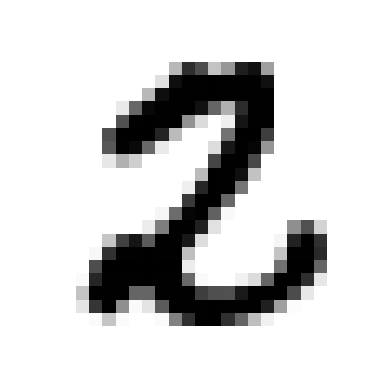

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

In [27]:
import matplotlib
import matplotlib.pyplot as plt

i = 12
plt.imshow(x_train[:, i].reshape(28, 28), cmap=matplotlib.cm.binary)
plt.axis("off")
plt.show()
y_train[:, i]

In [30]:
def sigmoid(z):
    s = 1.0 / (1.0 + np.exp(-z))
    return s

In [28]:
def comput_multiclass_loss(y, y_hat):
    L_sum = np.sum(np.multiply(y, np.log(y_hat)))
    m = y.shape[1]
    L = -(1/m) * L_sum
    return L

In [29]:
digits = 10
n_x, n_h = x_train.shape[0], 64
learning_rate = 1

w1 = np.random.randn(n_h, n_x)
b1 = np.zeros((n_h, 1))
w2 = np.random.randn(digits, n_h)
b2 = np.zeros((digits, 1))

X, Y = x_train, y_train

print(f"X의 shape : {X.shape},   Y의 shape : {Y.shape}")

X의 shape : (784, 60000),   Y의 shape : (10, 60000)


In [31]:
for i in range(2000):
    Z1 = np.matmul(w1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(w2, A1) + b2
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)
    
    cost = comput_multiclass_loss(Y, A2)
    
    dZ2 = A2 - Y
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)
    
    dA1 = np.matmul(w2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./m) * np.matmul(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)
    
    w2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    w1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    
    if (i % 100 == 0):
        print(f"Epoch {i: .4d}       cost : {cost}")
print("Final cost : ", cost)

Epoch    0       cost : 9.734082013758602
Epoch  100       cost : 0.7505197512444232
Epoch  200       cost : 0.5605266132154871
Epoch  300       cost : 0.4815003598755821
Epoch  400       cost : 0.4348225551354636
Epoch  500       cost : 0.40250199554601135
Epoch  600       cost : 0.3779448680030466
Epoch  700       cost : 0.35826004197892525
Epoch  800       cost : 0.34191000788620574
Epoch  900       cost : 0.32794299968753315
Epoch  1000       cost : 0.31574902353437423
Epoch  1100       cost : 0.3049308507524267
Epoch  1200       cost : 0.29522007444119647
Epoch  1300       cost : 0.2864181098235761
Epoch  1400       cost : 0.27837030343276775
Epoch  1500       cost : 0.27095795549846335
Epoch  1600       cost : 0.26409153380932615
Epoch  1700       cost : 0.25770261948573064
Epoch  1800       cost : 0.25173770010981844
Epoch  1900       cost : 0.2461524459434124
Final cost :  0.24095866567169494


In [33]:
print(f"w1의 shape : {w1.shape}, b1의 shape : {b1.shape}, z1의 shape : {Z1.shape}")   # (64, 784), (64, 1), (64, 60000)
print(f"w2의 shape : {w2.shape},  b2의 shape : {b2.shape}, z2의 shape : {Z2.shape}")   # (10, 64),  (10, 1), (10, 60000)

w1의 shape : (64, 784), b1의 shape : (64, 1), z1의 shape : (64, 60000)
w2의 shape : (10, 64),  b2의 shape : (10, 1), z2의 shape : (10, 60000)


In [34]:
from sklearn.metrics import confusion_matrix, classification_report

z1_test = np.matmul(w1, x_test) + b1
a1_test = sigmoid(z1_test)
z2_test = np.matmul(w2, a1_test) + b2
a2_test = np.exp(z2_test) / np.sum(np.exp(z2_test), axis=0)